In [489]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt

In [490]:
end_date = dt.datetime.today()
start_date = end_date - pd.Timedelta(days = 2520)

In [491]:
stock = '^NSEI'
df = yf.download(stock,start_date,end_date)

[*********************100%%**********************]  1 of 1 completed


In [492]:
df.drop(columns = ['Volume','Close'],inplace = True)

In [493]:
df['simple returns'] = df['Adj Close'].pct_change()

In [494]:
df['ma'] = df['Adj Close'].rolling(window = 5).mean()
df['ma'] = df['ma'].shift(1)

In [495]:
df['positions'] = np.where(df['Adj Close']>df['ma'],1,0)
# df['positions'] = np.where(df['Adj Close']<df['ma'],-1,df['positions'])
df['positions'] = df['positions'].shift(1)

In [496]:
df['strategy_returns'] =df['positions']*df['simple returns']

In [497]:
df['strategy_returns'] = df['strategy_returns']+1
df['simple returns'] = df['simple returns']+1

<Axes: xlabel='Date'>

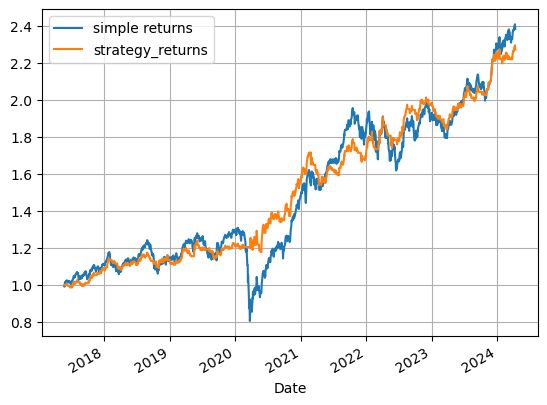

In [498]:
df[['simple returns','strategy_returns']].cumprod().plot(grid = True)